In [1]:
import requests
import pandas as pd


url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    records = data['result']['records']
    df = pd.DataFrame(records)
    print(df.head(), df.info(), df.describe(include='all'))
else:
    print("Error al acceder a la API:", response.status_code)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9177 entries, 0 to 9176
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  9177 non-null   int64 
 1   inscripcion_numero   9177 non-null   object
 2   denominacion_social  9177 non-null   object
 3   tipo                 9177 non-null   object
 4   cnae_codigo          9177 non-null   object
 5   cnae_descripcion     9177 non-null   object
 6   codigo_postal        9177 non-null   object
 7   municipio_nombre     9177 non-null   object
 8   domicilio            9177 non-null   object
 9   inscripcion_fecha    9177 non-null   object
 10  baja_fecha           9177 non-null   object
dtypes: int64(1), object(10)
memory usage: 788.8+ KB
   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñ

In [2]:
#Limpieza de los datos

# 1. Convertir las columnas de fechas a formato datetime
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce', dayfirst=True)
df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce', dayfirst=True)

# 2. Eliminar duplicados basados en 'inscripcion_numero' y 'denominacion_social'
df.drop_duplicates(subset=['inscripcion_numero', 'denominacion_social'], inplace=True)

# 3. Eliminar filas con valores nulos en las columnas especificadas
df.dropna(subset=['cnae_descripcion'], inplace=True)
df.dropna(subset=['domicilio', 'inscripcion_fecha'], inplace=True)

# 4. # Crear la columna 'estado'
df['estado'] = np.where(df['baja_fecha'].isnull(), 'Activa', 'Baja')

# 5. Eliminar filas con valores no numéricos y espacios en blanco
df['codigo_postal'] = pd.to_numeric(df['codigo_postal'], errors='coerce')

# Eliminar los valores nulos resultantes de la conversión fallida
df.dropna(subset=['codigo_postal'], inplace=True)

# Convertir a entero
df['codigo_postal'] = df['codigo_postal'].astype(int)

# 6. Convertir columnas a tipo categórico para optimización
categorical_columns = ['inscripcion_numero', 'tipo',
       'cnae_codigo', 'cnae_descripcion','municipio_nombre',
       ]

# 7.Convertir las columnas seleccionadas a tipo 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Calcular la cantidad de registros después de la limpieza
cleaned_count = len(df)

# Calcular el porcentaje de datos eliminados
original_count = 9177
removed_percentage = ((original_count - cleaned_count) / original_count) * 100

# Mostrar el porcentaje de datos eliminados y el total de registros restantes
removed_percentage, cleaned_count

NameError: name 'np' is not defined

In [ ]:
# Mostrar las primeras filas para entender su estructura
df.head(), df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 8839 entries, 0 to 9176
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _id                  8839 non-null   int64         
 1   inscripcion_numero   8839 non-null   category      
 2   denominacion_social  8839 non-null   object        
 3   tipo                 8839 non-null   category      
 4   cnae_codigo          8839 non-null   category      
 5   cnae_descripcion     8839 non-null   category      
 6   codigo_postal        8839 non-null   int64         
 7   municipio_nombre     8839 non-null   category      
 8   domicilio            8839 non-null   object        
 9   inscripcion_fecha    8839 non-null   datetime64[ns]
 10  baja_fecha           8839 non-null   object        
dtypes: category(5), datetime64[ns](1), int64(2), object(3)
memory usage: 930.4+ KB


(   _id inscripcion_numero                                denominacion_social  \
 0    1               0000                                 AGUACATE AUTOS SAL   
 1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
 2    3                  1                               ABRALIA SYSTEMS, SAL   
 3    4                  1                                   IMPERLAIM, S.A.L   
 4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   
 
   tipo cnae_codigo                                   cnae_descripcion  \
 0   SA          45  Venta y reparación de vehículos de motor y mot...   
 1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
 2   SA          74  Otras actividades profesionales, científicas y...   
 3   SA          45                                       CONSTRUCCION   
 4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   
 
    codigo_postal   municipio_nombre                          domi

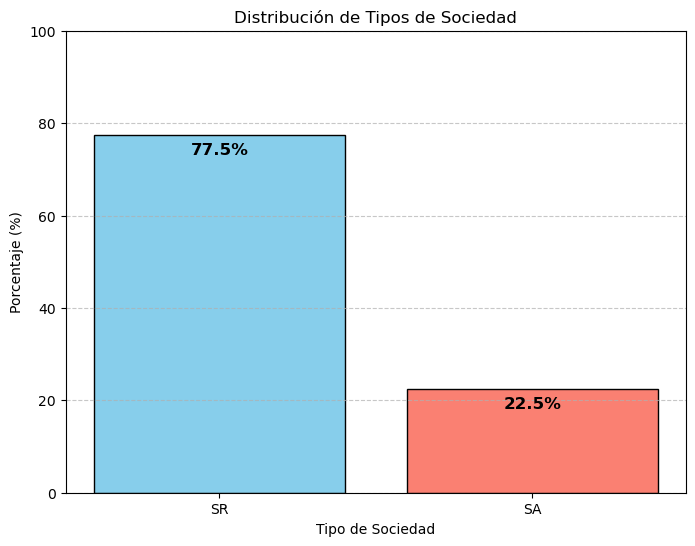

In [ ]:
import matplotlib.pyplot as plt

# Analizar la distribución de la columna 'tipo'
tipo_counts = df['tipo'].value_counts(normalize=True) * 100

# Graficar la distribución con porcentajes mostrados en las barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tipo_counts.index, tipo_counts, color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')

# Añadir el porcentaje encima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Distribución de Tipos de Sociedad')
plt.xlabel('Tipo de Sociedad')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



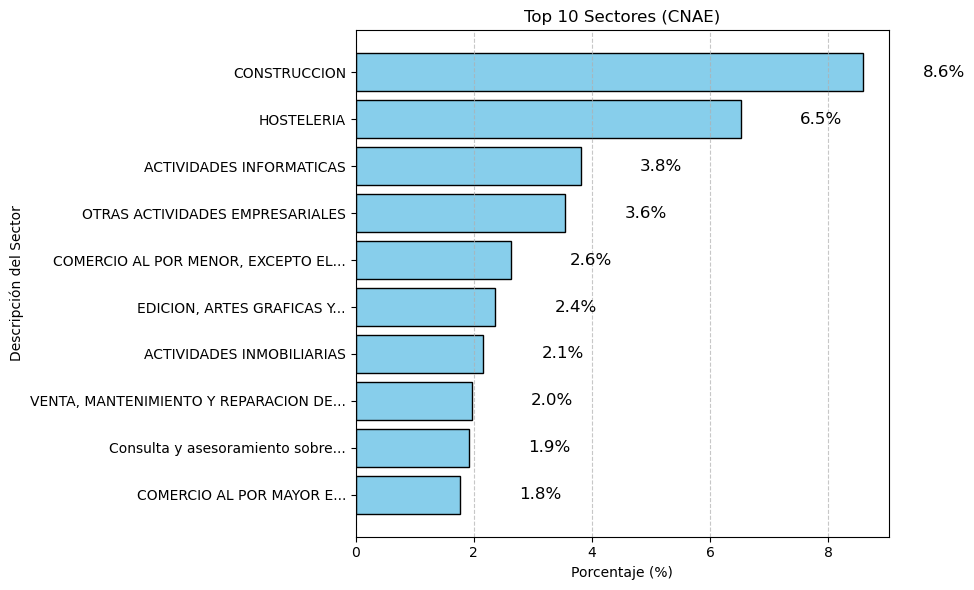

In [ ]:
import matplotlib.pyplot as plt
import textwrap

# Obtener los 10 sectores más comunes y calcular los porcentajes
cnae_counts = df['cnae_descripcion'].value_counts(normalize=True).head(10) * 100

# Reducir la longitud de los nombres de los sectores
shortened_labels = [textwrap.shorten(label, width=40, placeholder="...") for label in cnae_counts.index]

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(shortened_labels, cnae_counts.values, color='skyblue', edgecolor='black')

# Añadir el porcentaje al final de cada barra
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}%', va='center', fontsize=12)

# Personalizar el gráfico
plt.title("Top 10 Sectores (CNAE)")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Descripción del Sector")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más común en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset proporcionado por el usuario
file_path = 'df_s (1).csv'
df = pd.read_csv(file_path)

# Ajustar la función para agrupar aún más sectores similares
def normalizar_sector(sector):
    # Convertir a minúsculas
    sector = str(sector).lower()
    # Eliminar caracteres especiales
    sector = sector.replace("&", "and").replace("/", " ").replace("-", " ").strip()
    
    # Unificar términos comunes (agregando más agrupaciones)
    if "tecnología" in sector or "informática" in sector or "software" in sector or "programación" in sector:
        return "tecnología"
    elif "salud" in sector or "hospital" in sector or "médico" in sector or "farmacia" in sector or "biotecnología" in sector:
        return "salud"
    elif "educación" in sector or "academia" in sector or "escuela" in sector or "formación" in sector or "universidad" in sector:
        return "educación"
    elif "construcción" in sector or "obra" in sector or "edificación" in sector or "infraestructura" in sector:
        return "construcción"
    elif "hostelería" in sector or "restaurante" in sector or "hotel" in sector or "catering" in sector or "alojamiento" in sector:
        return "hostelería"
    elif "comercio" in sector or "venta" in sector or "minorista" in sector or "mayorista" in sector or "distribución" in sector:
        return "comercio"
    elif "consultoría" in sector or "asesoría" in sector or "consulting" in sector or "gestión empresarial" in sector:
        return "consultoría"
    elif "automoción" in sector or "vehículo" in sector or "mantenimiento" in sector or "taller" in sector:
        return "automoción"
    elif "inmobiliaria" in sector or "propiedad" in sector or "bienes raíces" in sector or "arrendamiento" in sector:
        return "inmobiliaria"
    elif "servicios" in sector or "personal" in sector or "domicilio" in sector or "limpieza" in sector:
        return "servicios personales"
    elif "finanzas" in sector or "banco" in sector or "seguros" in sector or "inversión" in sector:
        return "finanzas"
    elif "manufactura" in sector or "fabricación" in sector or "producción" in sector:
        return "manufactura"
    # Agregar más reglas de unificación según sea necesario
    return sector

# Aplicar la normalización con la nueva lógica de agrupación
df['sector_normalizado'] = df['cnae_descripcion'].apply(normalizar_sector)

# Recalcular los 10 sectores más comunes para definir la variable top_10_sectores
top_10_sectores = df['sector_normalizado'].value_counts().head(10)

# Generar el gráfico de barras para los 10 sectores más comunes
plt.figure(figsize=(10, 6))
top_10_sectores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Sectores Más Comunes (Agrupados)')
plt.xlabel('Sector')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'df_s (1).csv'

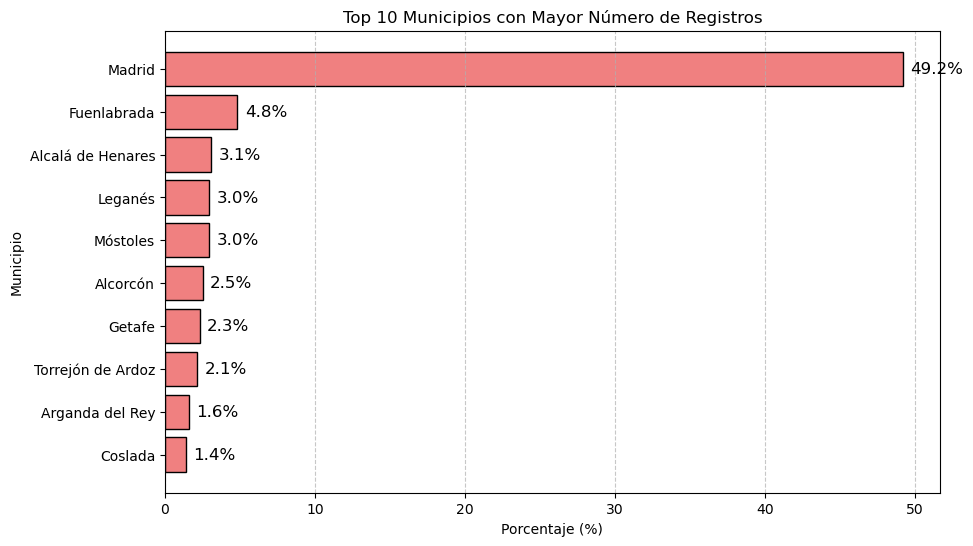

In [ ]:
# Analizar la distribución de la columna 'municipio_nombre' para los 10 municipios más comunes
municipio_counts = df['municipio_nombre'].value_counts(normalize=True).head(10) * 100

# Crear gráfico de barras horizontales para los municipios más comunes
plt.figure(figsize=(10, 6))
bars = plt.barh(municipio_counts.index, municipio_counts.values, color='lightcoral', edgecolor='black')

# Añadir el porcentaje al final de cada barra
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}%', va='center', fontsize=12)

plt.title("Top 10 Municipios con Mayor Número de Registros")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Municipio")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más común en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df

,_id,inscripcion_numero,denominacion_social,tipo,cnae_codigo,cnae_descripcion,codigo_postal,municipio_nombre,domicilio,inscripcion_fecha,baja_fecha
0,1,0000,AGUACATE AUTOS SAL,SA,45,Venta y reparación de vehículos de motor y mot...,28044,Madrid,"C/AGUACATE, 40",1994-04-12,Activo
1,2,06399,COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL,SA,51,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,28013,Madrid,CL ARENAL 4 SEXTA PLANTA DPCHO 61,1989-07-12,Activo
2,3,1,"ABRALIA SYSTEMS, SAL",SA,74,"Otras actividades profesionales, científicas y...",28021,Madrid,"CL VALLE DE TOBALINA, 32, NV 7-8",1995-12-27,Activo
3,4,1,"IMPERLAIM, S.A.L",SA,45,CONSTRUCCION,28938,Móstoles,"CL CAMINO DE HUMANES, 51",1996-01-15,Activo
4,5,10,INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...,SA,28,"FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...",28529,Rivas-Vaciamadrid,"CL ELECTRODO - NAVE 20, 66",1996-01-30,Activo
...,...,...,...,...,...,...,...,...,...,...,...
9171,9172,986,"OLLERO VERDUGO ASOCIADOS, SOCIEDAD DE RESPONSA...",SR,7411,Actividades jurídicas,28004,Madrid,"CL SAGASTA, 22 - 1º",1999-01-21,Activo
9172,9173,987,"JACUJO, S.L.L.",SR,522,"COMERCIO AL POR MENOR DE ALIMENTOS, BEBIDAS Y ...",28016,Madrid,"CL COLOMBIA, 3 - LC BJ",1999-01-21,Activo
9174,9175,988,"UNIVERSODELFIN, S.L.L.",SR,9302,Peluquería y otros tratamientos de belleza,28945,Fuenlabrada,"CL CALLAO, 56",1999-01-21,2018-02-22 00:00:00
9175,9176,989,"ESCAYOLAS HERMANOS RICO, S.L.L.",SR,454,ACABADO DE EDIFICIOS Y OBRAS,28941,Fuenlabrada,"CL CASTILLA LA NUEVA, 31",1999-01-25,Activo


In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Porcentaje de Crecimiento de Empresas por Municipio
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y contar el número de empresas en los últimos 10 años
            empresas_por_municipio_last_10_years = df_last_10_years['municipio_nombre'].value_counts()
            
            # Agrupar por municipio y contar el número total de empresas
            empresas_por_municipio_total = df['municipio_nombre'].value_counts()
            
            # Calcular el porcentaje de crecimiento
            porcentaje_crecimiento = (empresas_por_municipio_last_10_years / empresas_por_municipio_total) * 100
            porcentaje_crecimiento = porcentaje_crecimiento.dropna().sort_values(ascending=False)
            
            # Crear un DataFrame con los municipios de mayor inscripción en los últimos 10 años
            municipios_top = empresas_por_municipio_last_10_years.head(10).index
            resumen_municipios = pd.DataFrame({
                'Municipio': municipios_top,
                'Cantidad de Empresas': empresas_por_municipio_last_10_years[municipios_top].values,
                'Porcentaje de Inscripciones por Año': (empresas_por_municipio_last_10_years[municipios_top] / 10).values
            })
            
            # Mostrar el cuadro resumen
            print(resumen_municipios)
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

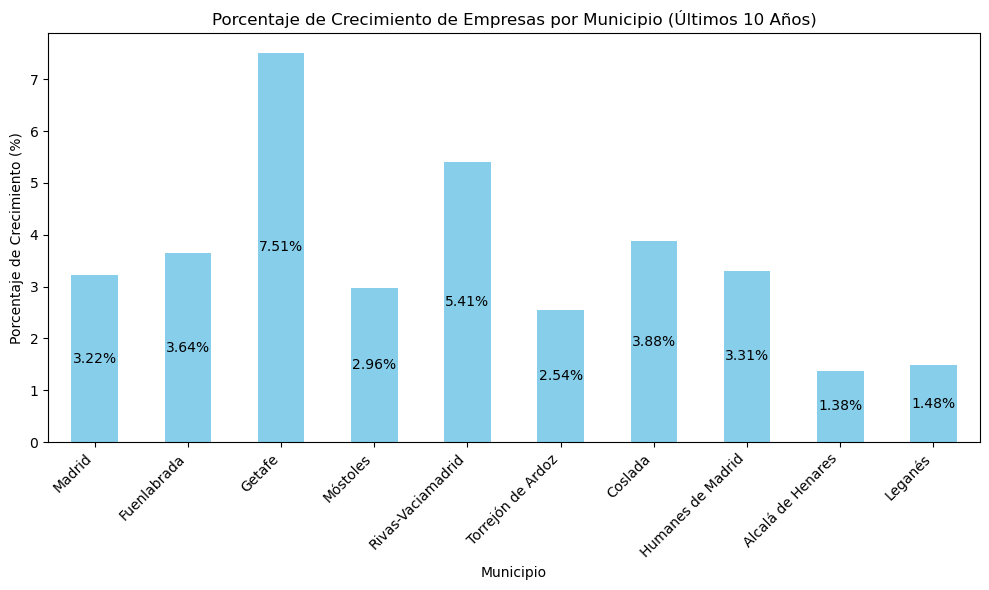

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Porcentaje de Crecimiento de Empresas por Municipio
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y contar el número de empresas en los últimos 10 años
            empresas_por_municipio_last_10_years = df_last_10_years['municipio_nombre'].value_counts()
            
            # Agrupar por municipio y contar el número total de empresas
            empresas_por_municipio_total = df['municipio_nombre'].value_counts()
            
            # Calcular el porcentaje de crecimiento
            porcentaje_crecimiento = (empresas_por_municipio_last_10_years / empresas_por_municipio_total) * 100
            porcentaje_crecimiento = porcentaje_crecimiento.dropna().sort_values(ascending=False)
            
            # Crear un DataFrame con los municipios de mayor inscripción en los últimos 10 años
            municipios_top = empresas_por_municipio_last_10_years.head(10).index
            resumen_municipios = pd.DataFrame({
                'Municipio': municipios_top,
                'Cantidad de Empresas': empresas_por_municipio_last_10_years[municipios_top].values,
                'Porcentaje de Inscripciones por Año': (empresas_por_municipio_last_10_years[municipios_top] / 10).values
            })
            
            # Mostrar el cuadro resumen en un formato adecuado para una presentación
            print(resumen_municipios.to_string(index=False))
            
            # Visualización del porcentaje de crecimiento de empresas por municipio
            plt.figure(figsize=(10, 6))
            ax = porcentaje_crecimiento.loc[municipios_top].plot(kind='bar', color='skyblue')
            plt.title('Porcentaje de Crecimiento de Empresas por Municipio (Últimos 10 Años)')
            plt.xlabel('Municipio')
            plt.ylabel('Porcentaje de Crecimiento (%)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            
            # Añadir el porcentaje en medio de cada barra
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                            ha='center', va='center', fontsize=10, color='black')
            
            plt.show()
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

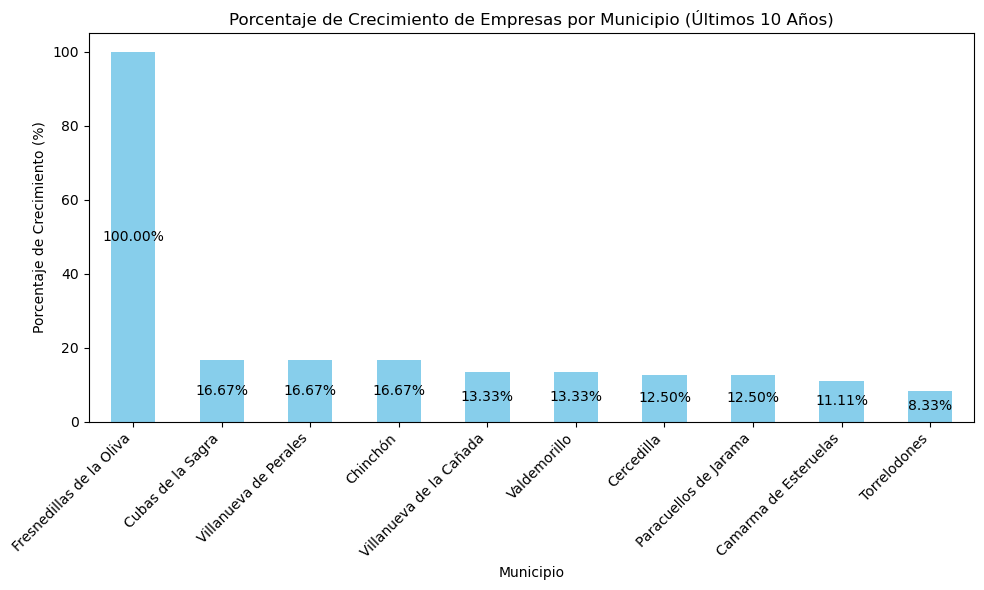

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Porcentaje de Crecimiento de Empresas por Municipio
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y contar el número de empresas en los últimos 10 años
            empresas_por_municipio_last_10_years = df_last_10_years['municipio_nombre'].value_counts()
            
            # Agrupar por municipio y contar el número total de empresas
            empresas_por_municipio_total = df['municipio_nombre'].value_counts()
            
            # Calcular el porcentaje de crecimiento
            porcentaje_crecimiento = (empresas_por_municipio_last_10_years / empresas_por_municipio_total) * 100
            porcentaje_crecimiento = porcentaje_crecimiento.dropna().sort_values(ascending=False)
            
            # Crear un DataFrame con los municipios de mayor inscripción en los últimos 10 años
            municipios_top = porcentaje_crecimiento.head(10).index
            resumen_municipios = pd.DataFrame({
                'Municipio': municipios_top,
                'Cantidad de Empresas': empresas_por_municipio_last_10_years[municipios_top].values,
                'Porcentaje de Inscripciones por Año': porcentaje_crecimiento[municipios_top].values
            })
            
            # Mostrar el cuadro resumen en un formato adecuado para una presentación
            print(resumen_municipios.to_string(index=False))
            
            # Mostrar cuántas empresas se inscribieron en los municipios de mayor inscripción
            total_empresas_top_municipios = empresas_por_municipio_last_10_years[municipios_top].sum()
            print(f"Total de empresas inscritas en los municipios de mayor inscripción en los últimos 10 años: {total_empresas_top_municipios}")
            
            # Visualización del porcentaje de crecimiento de empresas por municipio
            plt.figure(figsize=(10, 6))
            ax = porcentaje_crecimiento.loc[municipios_top].plot(kind='bar', color='skyblue')
            plt.title('Porcentaje de Crecimiento de Empresas por Municipio (Últimos 10 Años)')
            plt.xlabel('Municipio')
            plt.ylabel('Porcentaje de Crecimiento (%)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            
            # Añadir el porcentaje en medio de cada barra
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                            ha='center', va='center', fontsize=10, color='black')
            
            plt.show()
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Porcentaje de Crecimiento de Empresas por Municipio
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y contar el número de empresas en los últimos 10 años
            empresas_por_municipio_last_10_years = df_last_10_years['municipio_nombre'].value_counts()
            
            # Agrupar por municipio y contar el número total de empresas
            empresas_por_municipio_total = df['municipio_nombre'].value_counts()
            
            # Calcular el porcentaje de crecimiento
            porcentaje_crecimiento = (empresas_por_municipio_last_10_years / empresas_por_municipio_total) * 100
            porcentaje_crecimiento = porcentaje_crecimiento.dropna().sort_values(ascending=False)
            
            # Crear un DataFrame con los municipios de mayor inscripción en los últimos 10 años
            municipios_top = porcentaje_crecimiento.head(10).index
            resumen_municipios = pd.DataFrame({
                'Municipio': municipios_top,
                'Cantidad de Empresas': empresas_por_municipio_last_10_years[municipios_top].values,
                'Porcentaje de Inscripciones por Año': porcentaje_crecimiento[municipios_top].values
            })
            
            # Mostrar el cuadro resumen en un formato adecuado para una presentación
            print(resumen_municipios.to_string(index=False))
            
            # Mostrar cuántas empresas se inscribieron en los municipios de mayor inscripción
            total_empresas_top_municipios = empresas_por_municipio_last_10_years[municipios_top].sum()
            resumen_total = pd.DataFrame({
                'Descripción': ['Total de empresas inscritas en los municipios de mayor inscripción'],
                'Total': [total_empresas_top_municipios]
            })
            
            # Mostrar el cuadro resumen total
            print(resumen_total.to_string(index=False))
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Municipios con más inscripciones en los últimos 10 años
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y contar el número de empresas en los últimos 10 años
            empresas_por_municipio_last_10_years = df_last_10_years['municipio_nombre'].value_counts().sort_values(ascending=False)
            
            # Crear un DataFrame con los municipios de mayor inscripción en los últimos 10 años
            municipios_top = empresas_por_municipio_last_10_years.head(10).index
            resumen_municipios = pd.DataFrame({
                'Municipio': municipios_top,
                'Cantidad de Empresas': empresas_por_municipio_last_10_years[municipios_top].values
            })
            
            # Mostrar el cuadro resumen en un formato adecuado para una presentación
            print(resumen_municipios.to_string(index=False))
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

In [ ]:
import pandas as pd

# Encontrar los 3 años de mayor y menor crecimiento porcentual
mayor_crecimiento = crecimiento_df.sort_values(by='Crecimiento Porcentual (%)', ascending=False).head(3)
menor_crecimiento = crecimiento_df.sort_values(by='Crecimiento Porcentual (%)', ascending=True).head(3)

# Mostrar los resultados
print("3 Años de Mayor Crecimiento:")
print(mayor_crecimiento)

print("\n3 Años de Menor Crecimiento:")
print(menor_crecimiento)


3 Años de Mayor Crecimiento:
     Año  Empresas Creadas  Crecimiento Porcentual (%)
12  1998               667                  190.000000
2   1988               368                  162.857143
8   1994               210                   92.660550

3 Años de Menor Crecimiento:
     Año  Empresas Creadas  Crecimiento Porcentual (%)
4   1990                89                  -62.127660
36  2022                53                  -41.758242
30  2016                46                  -37.837838


In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Definir la URL y los parámetros de la API
url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

# Realizar la solicitud GET a la API
response = requests.get(url, params=params)
data = response.json()

# Comprobar si la solicitud fue exitosa
if response.status_code == 200 and data['success']:
    # Convertir los registros a un DataFrame de pandas
    records = data['result']['records']
    df = pd.DataFrame.from_records(records)
    
    # Mostrar una vista previa de los primeros registros
    print(df.head())
    
    # Guardar el DataFrame en un archivo CSV para la posterior limpieza
    df.to_csv('empresas_madrid.csv', index=False)
    
    # Filtrar empresas creadas en los últimos 10 años
    if 'inscripcion_fecha' in df.columns:
        df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
        last_10_years = datetime.now().year - 10
        df_last_10_years = df[df['inscripcion_fecha'].dt.year >= last_10_years]
        
        # Análisis: Inscripciones por municipio por año en los últimos 10 años
        if 'municipio_nombre' in df_last_10_years.columns:
            # Agrupar por municipio y año, y contar el número de inscripciones
            df_last_10_years['año'] = df_last_10_years['inscripcion_fecha'].dt.year
            inscripciones_por_municipio_año = df_last_10_years.groupby(['municipio_nombre', 'año']).size().reset_index(name='Cantidad de Empresas')
            
            # Mostrar el cuadro resumen en un formato adecuado para una presentación
            print(inscripciones_por_municipio_año.pivot(index='municipio_nombre', columns='año', values='Cantidad de Empresas').fillna(0).to_string())
        else:
            print("La columna 'municipio_nombre' no se encuentra en el DataFrame")
    else:
        print("La columna 'inscripcion_fecha' no se encuentra en el DataFrame")
else:
    print("Error al obtener los datos desde la API")


   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL   
2    3                  1                               ABRALIA SYSTEMS, SAL   
3    4                  1                                   IMPERLAIM, S.A.L   
4    5                 10  INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...   

  tipo cnae_codigo                                   cnae_descripcion  \
0   SA          45  Venta y reparación de vehículos de motor y mot...   
1   SA          51  COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...   
2   SA          74  Otras actividades profesionales, científicas y...   
3   SA          45                                       CONSTRUCCION   
4   SA          28  FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...   

  codigo_postal   municipio_nombre                          domicilio  \
0      

/tmp/ipykernel_1248/3118193758.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10_years['año'] = df_last_10_years['inscripcion_fecha'].dt.year


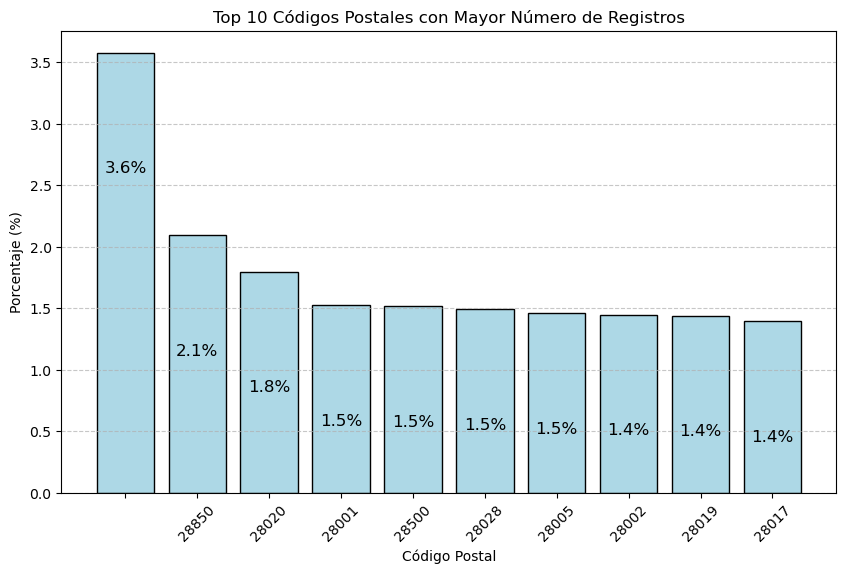

In [ ]:

# Analizar la distribución de la columna 'codigo_postal' para los 10 códigos postales más comunes
codigo_postal_counts = df['codigo_postal'].value_counts(normalize=True).head(10) * 100

# Crear gráfico de barras para los códigos postales más comunes
plt.figure(figsize=(10, 6))
bars = plt.bar(codigo_postal_counts.index.astype(str), codigo_postal_counts.values, color='lightblue', edgecolor='black')

# Añadir el porcentaje encima de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=12)

plt.title("Top 10 Códigos Postales con Mayor Número de Registros")
plt.xlabel("Código Postal")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_2716/2411719709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
/tmp/ipykernel_2716/2411719709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año_inscripcion'] = df['inscripcion_fecha'].dt.year


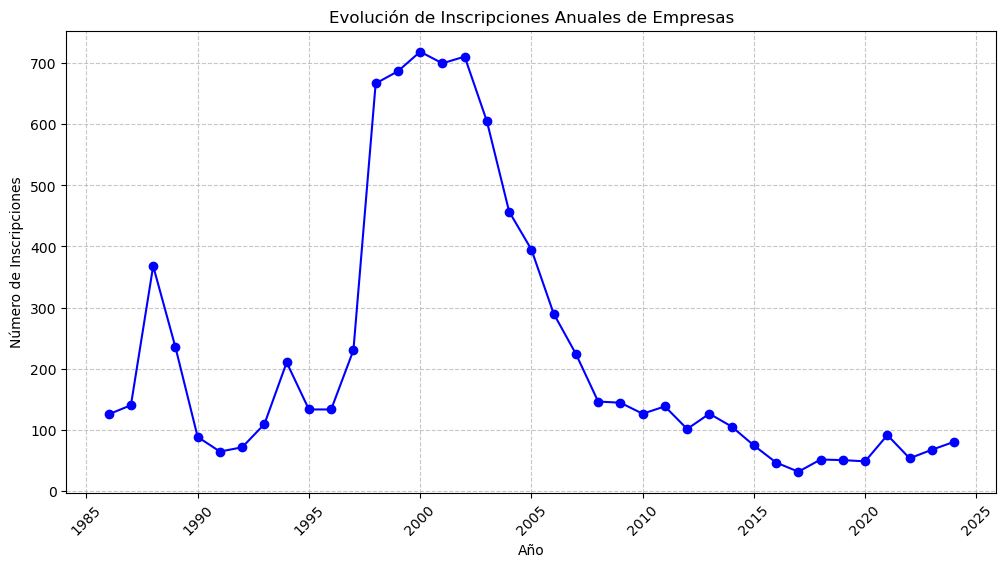

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'inscripcion_fecha' al formato datetime si no está ya convertida
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')

# Extraer el año de la fecha de inscripción
df['año_inscripcion'] = df['inscripcion_fecha'].dt.year

# Contar el número de inscripciones por año
inscripciones_anuales = df['año_inscripcion'].value_counts().sort_index()

# Graficar la evolución de inscripciones anuales
plt.figure(figsize=(12, 6))
plt.plot(inscripciones_anuales.index, inscripciones_anuales.values, marker='o', linestyle='-', color='blue')
plt.title("Evolución de Inscripciones Anuales de Empresas")
plt.xlabel("Año")
plt.ylabel("Número de Inscripciones")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_1248/1981904126.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')


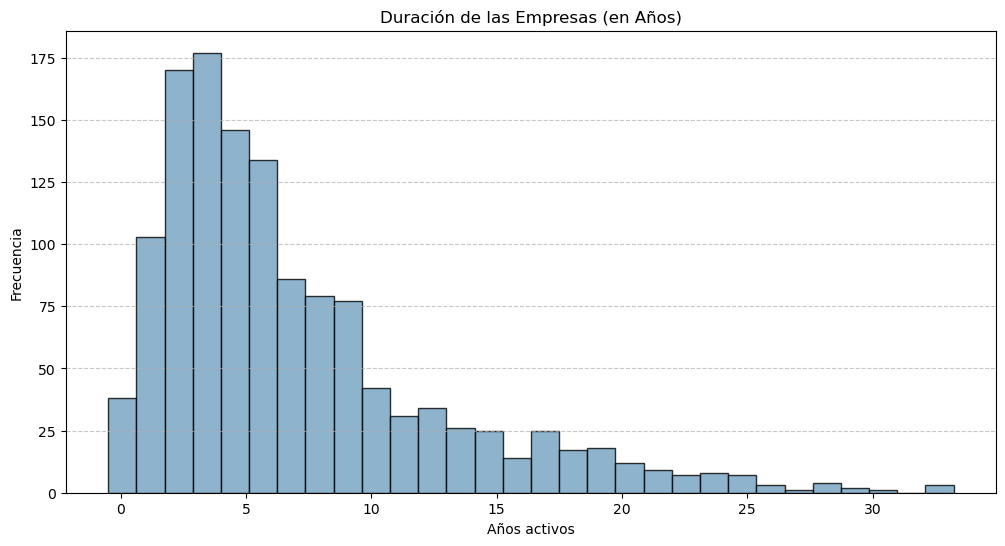

In [ ]:
import matplotlib.pyplot as plt

# Asegurarse de que las fechas están en formato datetime
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')

# Calcular la duración en años
df['duracion'] = (df['baja_fecha'] - df['inscripcion_fecha']).dt.days / 365.25

# Eliminar valores nulos antes de graficar
duracion_no_nula = df['duracion'].dropna()

# Crear un histograma con porcentajes y cambiar los colores
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(duracion_no_nula, bins=30, edgecolor='black', color='#72A0C1', alpha=0.8)

# Calcular el porcentaje para cada barra del histograma y añadirlo como etiqueta
#for i in range(len(patches)):
    #porcentaje = (n[i] / n.sum()) * 100
    #plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i], f"{porcentaje:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Duración de las Empresas (en Años)')
plt.xlabel('Años activos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipykernel_2716/693315534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
/tmp/ipykernel_2716/693315534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')
/tmp/ipykernel_2716/693315534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

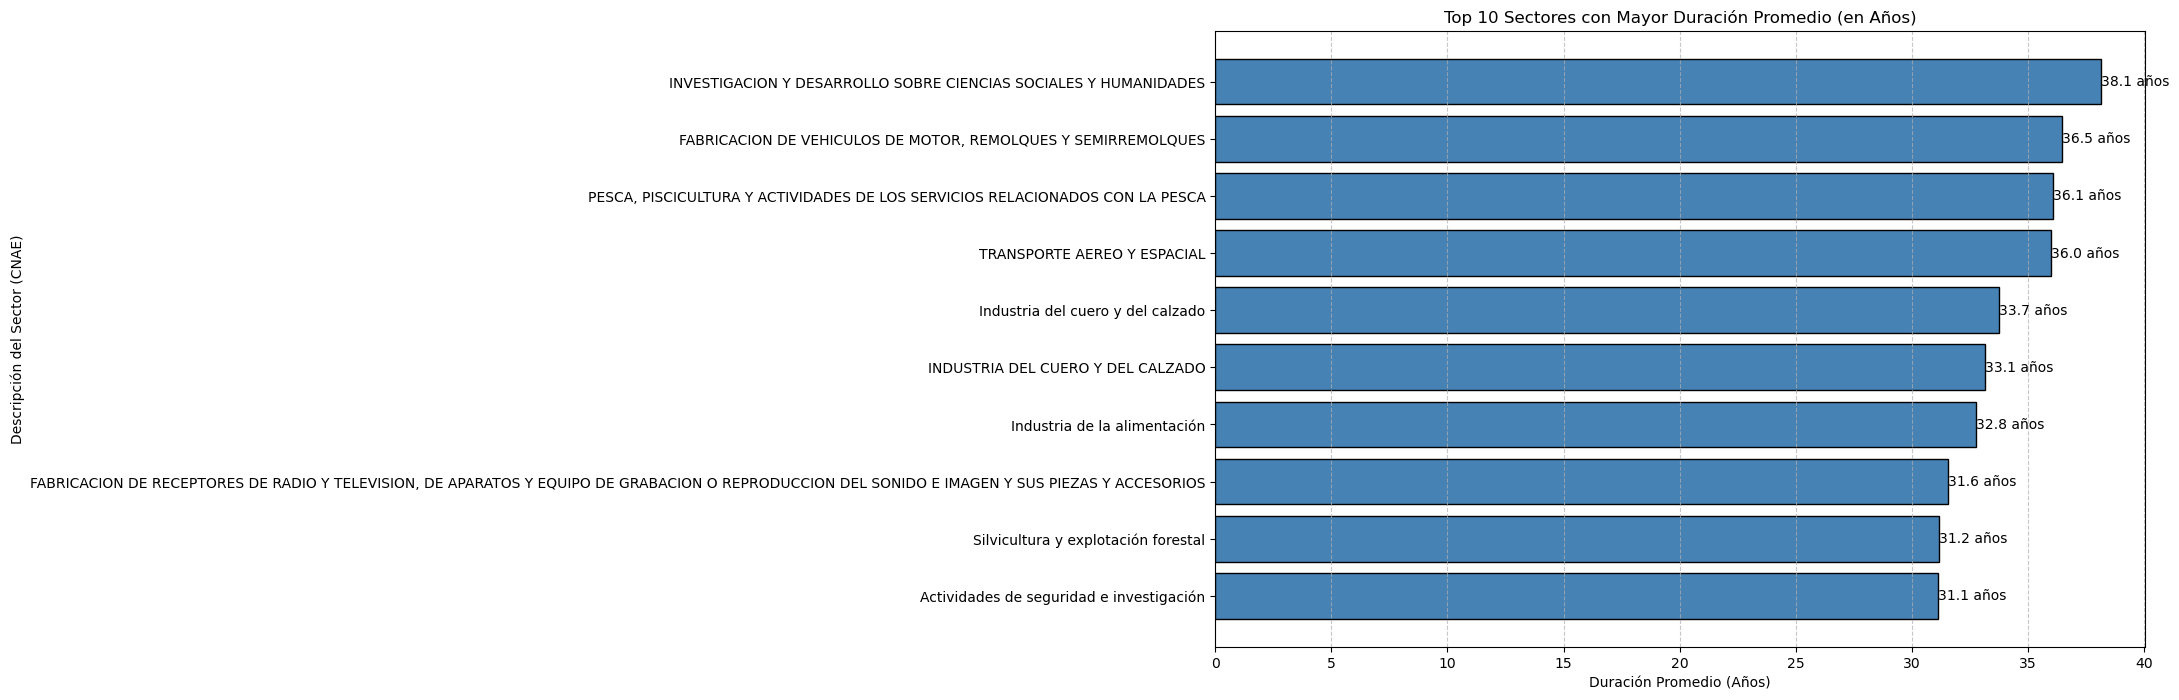

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que las fechas están en formato datetime
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')

# Calcular la duración en años
df['duracion'] = (df['baja_fecha'] - df['inscripcion_fecha']).dt.days / 365.25
df['duracion'] = df['duracion'].fillna((pd.Timestamp.now() - df['inscripcion_fecha']).dt.days / 365.25)

# Eliminar filas con descripciones de sectores vacías o nulas
df = df[df['cnae_descripcion'].notna() & (df['cnae_descripcion'].str.strip() != '')]

# Calcular la duración promedio por sector (cnae_descripcion)
sector_duracion = df.groupby('cnae_descripcion')['duracion'].mean().reset_index()

# Ordenar los sectores por la duración promedio y filtrar los 10 con mayor duración
top_10_sectores = sector_duracion.sort_values(by='duracion', ascending=False).head(10)

# Crear un gráfico de barras horizontales para los 10 sectores con mayor duración
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_sectores['cnae_descripcion'], top_10_sectores['duracion'], color='steelblue', edgecolor='black')

# Añadir etiquetas con la duración promedio en años al final de cada barra
for index, value in enumerate(top_10_sectores['duracion']):
    plt.text(value, index, f"{value:.1f} años", va='center')

plt.title("Top 10 Sectores con Mayor Duración Promedio (en Años)")
plt.xlabel("Duración Promedio (Años)")
plt.ylabel("Descripción del Sector (CNAE)")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el sector con mayor duración en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
pip install geopandas folium


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import geopandas as gpd
import folium

# Asegúrate de que las fechas y los datos están bien cargados
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')

# Verificar si la columna 'municipio_nombre' tiene valores nulos y llenarlos con 'Desconocido'
df['municipio_nombre'] = df['municipio_nombre'].fillna('Desconocido')

# Contar el número de empresas por municipio
empresas_por_municipio = df['municipio_nombre'].value_counts().reset_index()
empresas_por_municipio.columns = ['municipio', 'cantidad']

# Normalizar los nombres de los municipios para evitar problemas al hacer el merge
empresas_por_municipio['municipio'] = empresas_por_municipio['municipio'].str.strip().str.upper()

# Cargar un shapefile de los municipios de Madrid
shapefile_path = 'll_autonomicas_inspire_peninbal_etrs89.shp'
gdf_municipios = gpd.read_file(shapefile_path)

# Normalizar los nombres en el GeoDataFrame también
gdf_municipios['NOMBRE'] = gdf_municipios['NOMBRE'].str.strip().str.upper()

# Unir el shapefile con los datos de empresas
gdf_mapa = gdf_municipios.merge(empresas_por_municipio, left_on='NOMBRE', right_on='municipio', how='left')

# Convertir a GeoJSON
gdf_mapa_json = gdf_mapa.to_json()

# Crear un mapa interactivo centrado en Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=9)

# Añadir los datos al mapa usando Choropleth
folium.Choropleth(
    geo_data=gdf_mapa_json,
    data=gdf_mapa,
    columns=['NOMBRE', 'cantidad'],
    key_on='feature.properties.NOMBRE',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de Empresas por Municipio'
).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa_empresas_madrid.html')

# Mostrar el mapa
m


TypeError: Cannot setitem on a Categorical with a new category (Desconocido), set the categories first

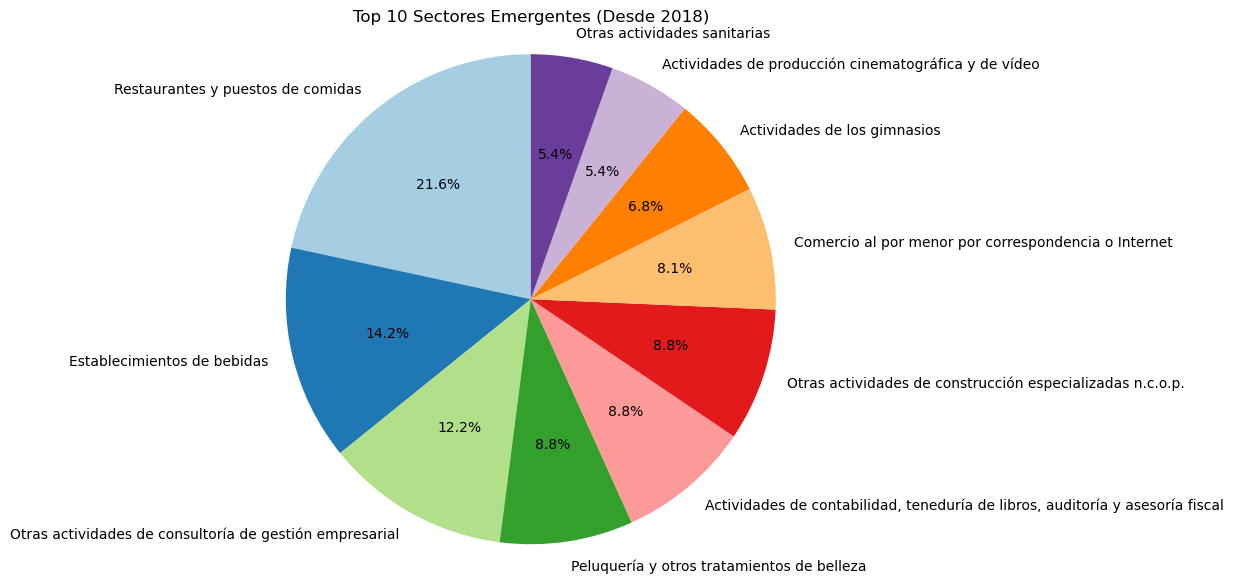

In [ ]:
import matplotlib.pyplot as plt

# Análisis de sectores emergentes (creación reciente)
df['año_inscripcion'] = df['inscripcion_fecha'].dt.year
sectores_emergentes = df[df['año_inscripcion'] >= 2018]['cnae_descripcion'].value_counts()

# Filtrar sectores sin nombre
sectores_emergentes = sectores_emergentes[sectores_emergentes.index.str.strip() != '']
sectores_emergentes = sectores_emergentes.head(10)

# Crear un gráfico de torta (pie chart) para los sectores emergentes
plt.figure(figsize=(10, 7))
plt.pie(sectores_emergentes, labels=sectores_emergentes.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Top 10 Sectores Emergentes (Desde 2018)")
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()



In [ ]:
pip install lifelines


  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=aea9e123ac7d71a2596d3b597840b2df8b49a20380d917d179a9fd3eb63cccc2
  Stored in directory: /home/daniela/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [23]:
import requests
import pandas as pd


url = 'https://datos.comunidad.madrid/api/3/action/datastore_search'
params = {
    'resource_id': '619d5f33-42d6-4d6a-a9b1-f6a5f2ed3921',
    'limit': 9177
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    records = data['result']['records']
    df1 = pd.DataFrame(records)
    print(df1.head(), df1.info(), df1.describe(include='all'))
else:
    print("Error al acceder a la API:", response.status_code)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9177 entries, 0 to 9176
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  9177 non-null   int64 
 1   inscripcion_numero   9177 non-null   object
 2   denominacion_social  9177 non-null   object
 3   tipo                 9177 non-null   object
 4   cnae_codigo          9177 non-null   object
 5   cnae_descripcion     9177 non-null   object
 6   codigo_postal        9177 non-null   object
 7   municipio_nombre     9177 non-null   object
 8   domicilio            9177 non-null   object
 9   inscripcion_fecha    9177 non-null   object
 10  baja_fecha           9177 non-null   object
dtypes: int64(1), object(10)
memory usage: 788.8+ KB
   _id inscripcion_numero                                denominacion_social  \
0    1               0000                                 AGUACATE AUTOS SAL   
1    2              06399    COMPAñIA ESPAñ

In [25]:
df1

,_id,inscripcion_numero,denominacion_social,tipo,cnae_codigo,cnae_descripcion,codigo_postal,municipio_nombre,domicilio,inscripcion_fecha,baja_fecha
0,1,0000,AGUACATE AUTOS SAL,SA,45,Venta y reparación de vehículos de motor y mot...,28044,Madrid,"C/AGUACATE, 40",1994-12-04,NaT
1,2,06399,COMPAñIA ESPAñOLA DE HIDRAULICA Y SERVICIOS SAL,SA,51,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,28013,Madrid,CL ARENAL 4 SEXTA PLANTA DPCHO 61,1989-12-07,NaT
2,3,1,"ABRALIA SYSTEMS, SAL",SA,74,"Otras actividades profesionales, científicas y...",28021,Madrid,"CL VALLE DE TOBALINA, 32, NV 7-8",NaT,NaT
3,4,1,"IMPERLAIM, S.A.L",SA,45,CONSTRUCCION,28938,Móstoles,"CL CAMINO DE HUMANES, 51",NaT,NaT
4,5,10,INSTALACION Y MANTENIMIENTO DE ACONDICIONADORE...,SA,28,"FABRICACION DE PRODUCTOS METALICOS, EXCEPTO MA...",28529,Rivas-Vaciamadrid,"CL ELECTRODO - NAVE 20, 66",NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
9172,9173,987,"JACUJO, S.L.L.",SR,522,"COMERCIO AL POR MENOR DE ALIMENTOS, BEBIDAS Y ...",28016,Madrid,"CL COLOMBIA, 3 - LC BJ",NaT,NaT
9173,9174,988,"LINCEX, 4 S.A.L.",SA,92,"ACTIVIDADES RECREATIVAS, CULTURALES Y DEPORTIVAS",,Madrid,"CL JUAN DE URBIETA, 10",1987-05-03,NaT
9174,9175,988,"UNIVERSODELFIN, S.L.L.",SR,9302,Peluquería y otros tratamientos de belleza,28945,Fuenlabrada,"CL CALLAO, 56",NaT,2018-02-22
9175,9176,989,"ESCAYOLAS HERMANOS RICO, S.L.L.",SR,454,ACABADO DE EDIFICIOS Y OBRAS,28941,Fuenlabrada,"CL CASTILLA LA NUEVA, 31",NaT,NaT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convertir las fechas a tipo datetime
df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')

# Calcular la duración en días
df['duracion'] = np.where(df['baja_fecha'].notnull(),
                          (df['baja_fecha'] - df['inscripcion_fecha']).dt.days,
                          0)

# Crear la etiqueta (target): 1 si la duración es mayor a 5 años (1825 días), 0 si no
df['larga_duracion'] = (df['duracion'] > 1825).astype(int)

# Seleccionar las columnas relevantes
df = df.dropna(subset=['cnae_codigo', 'codigo_postal', 'inscripcion_fecha'])
features = ['cnae_codigo', 'codigo_postal', 'inscripcion_fecha']
X = df[features]
y = df['larga_duracion']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, columns=['cnae_codigo', 'codigo_postal'])

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/tmp/ipykernel_2038/3964215793.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['baja_fecha'] = pd.to_datetime(df1['baja_fecha'], errors='coerce')


AttributeError: 'Series' object has no attribute 'dt1'

In [ ]:
# Verificar los tipos de datos de las características y la variable objetivo
print("Tipos de datos de las características (X):")
print(X.dtypes)
print("\nTipo de dato de la variable objetivo (y):", y.dtype)


Tipos de datos de las características (X):
inscripcion_fecha      datetime64[ns]
cnae_codigo_01                   bool
cnae_codigo_01123                bool
cnae_codigo_014                  bool
cnae_codigo_02                   bool
                            ...      
codigo_postal_28980              bool
codigo_postal_28981              bool
codigo_postal_28983              bool
codigo_postal_28990              bool
codigo_postal_28991              bool
Length: 766, dtype: object

Tipo de dato de la variable objetivo (y): int64


In [8]:
# Convertir fechas a formato numérico (días desde una fecha de referencia)
if 'inscripcion_fecha' in df.columns:
    df['inscripcion_fecha'] = pd.to_datetime(df['inscripcion_fecha'], errors='coerce')
    df['inscripcion_dias'] = (df['inscripcion_fecha'] - pd.Timestamp("2000-01-01")).dt.days

if 'baja_fecha' in df.columns:
    df['baja_fecha'] = pd.to_datetime(df['baja_fecha'], errors='coerce')
    df['baja_dias'] = (df['baja_fecha'] - pd.Timestamp("2000-01-01")).dt.days

# Eliminar las columnas originales de fechas
df.drop(['inscripcion_fecha', 'baja_fecha'], axis=1, inplace=True)


In [9]:
# Convertir columnas booleanas a enteros
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Eliminar columnas que no sean numéricas
df = df.select_dtypes(include=[np.number])


In [10]:
# Seleccionar características y la variable objetivo nuevamente
features = [col for col in df.columns if col != 'duracion']
X = df[features]
y = df['duracion']

# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar los tipos de datos después de la limpieza
print("\nTipos de datos después de la limpieza:")
print(X_train.dtypes)



Tipos de datos después de la limpieza:
_id                   int64
larga_duracion        int64
inscripcion_dias      int64
baja_dias           float64
dtype: object


In [11]:
# Eliminar filas con valores NaN en X y y
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [12]:
from sklearn.impute import SimpleImputer

# Crear un imputer para rellenar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputer a los datos de entrenamiento y prueba
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [14]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definir los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Entrenar los modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluar los modelos
metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    metrics[name] = mse
    print(f"{name} Mean Squared Error: {mse:.2f}")


Linear Regression Mean Squared Error: 0.00
Random Forest Mean Squared Error: 15105.36
